<a href="https://colab.research.google.com/github/nikhilrathaur/Online-News-Virality-Prediction/blob/master/NewsViralityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget 'http://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip'

In [0]:
!unzip '/content/OnlineNewsPopularity.zip'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/OnlineNewsPopularity/OnlineNewsPopularity.csv',sep='\s*,\s*')
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [0]:
#Separating URLs from the main data
df = df.drop(['url'],axis=1)

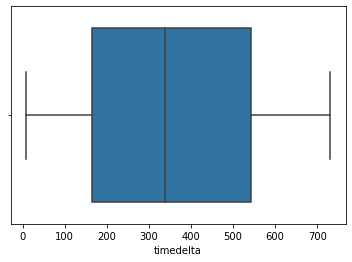

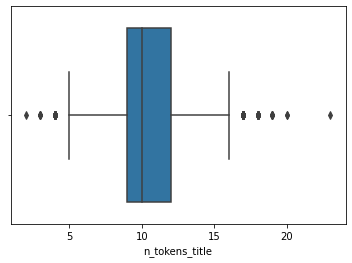

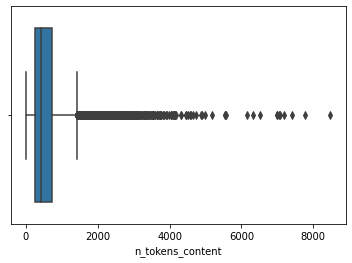

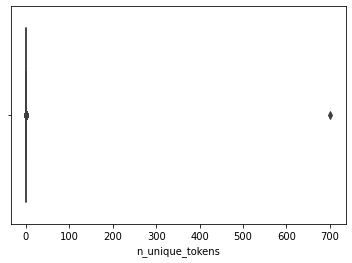

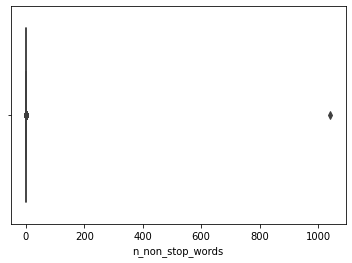

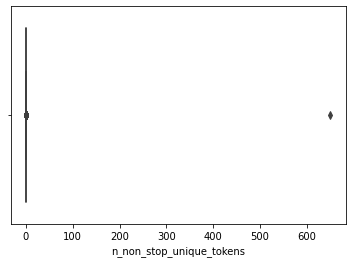

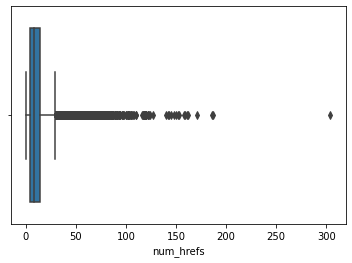

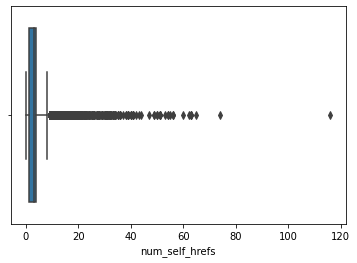

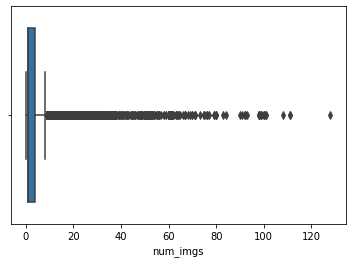

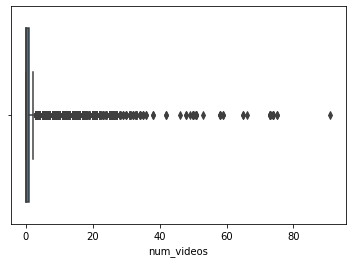

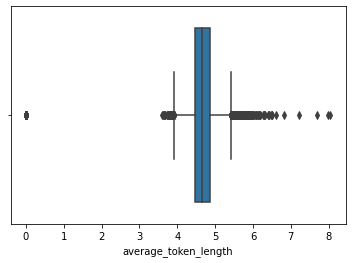

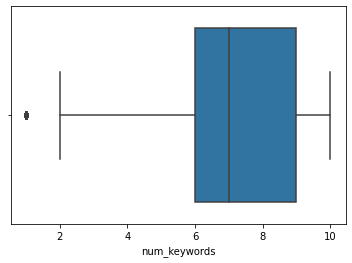

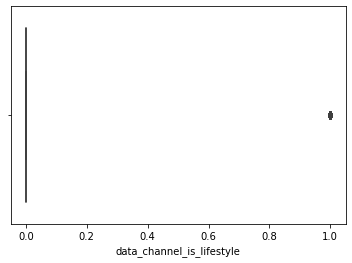

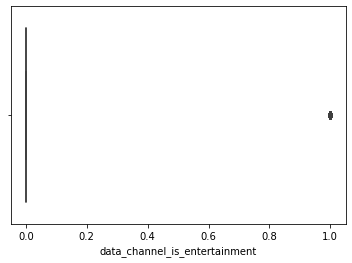

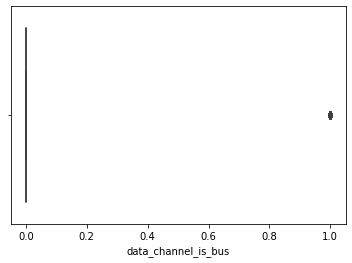

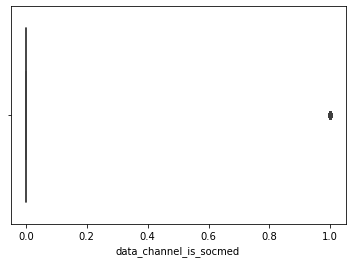

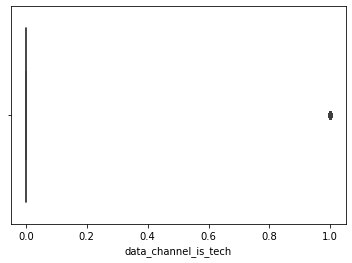

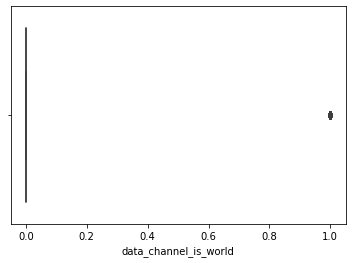

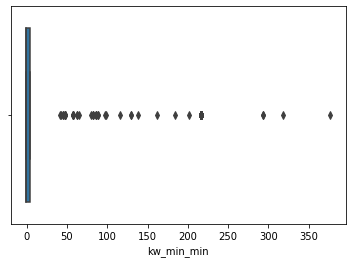

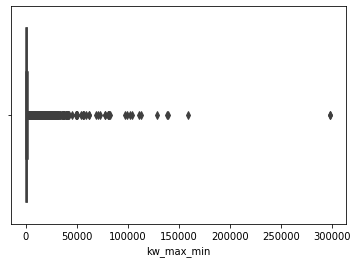

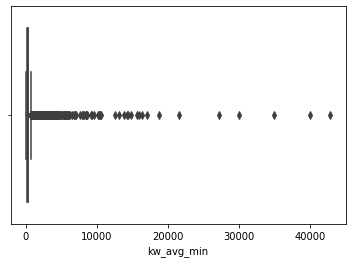

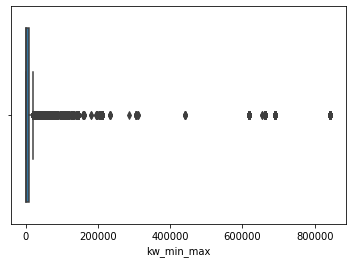

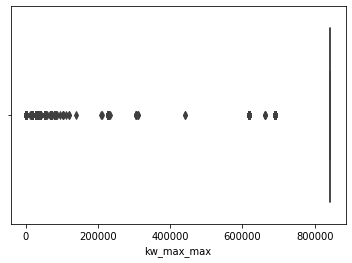

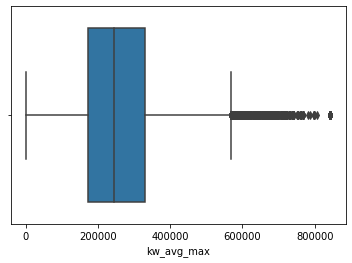

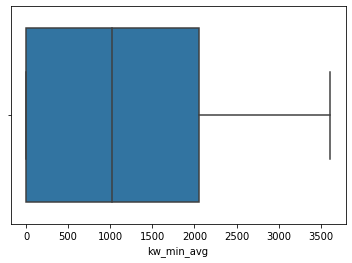

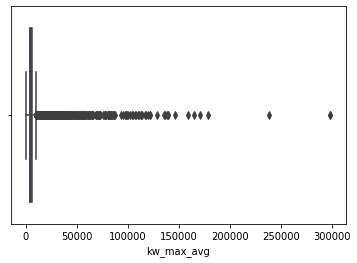

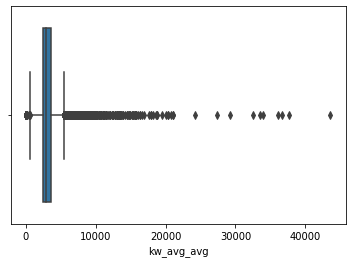

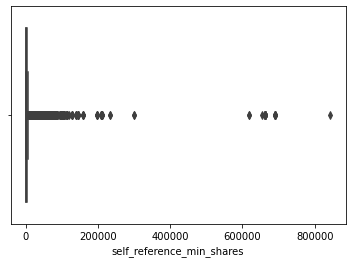

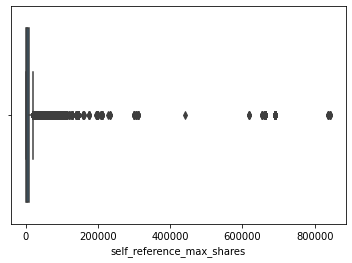

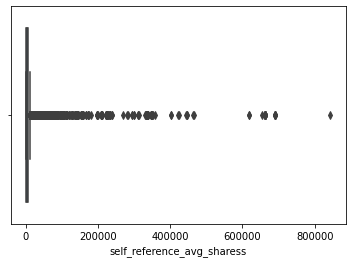

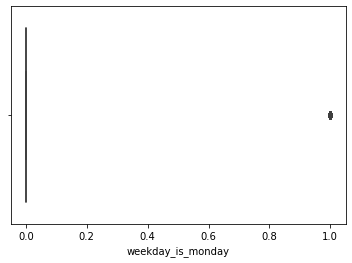

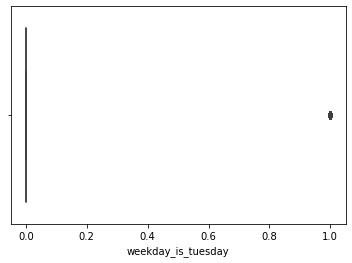

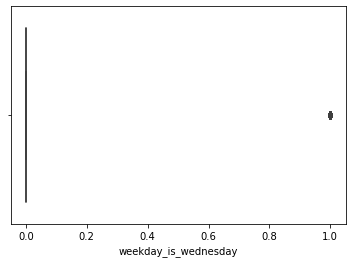

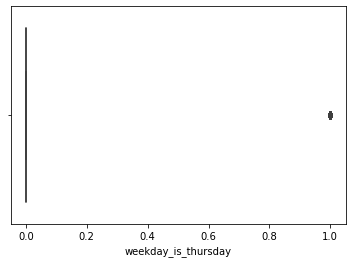

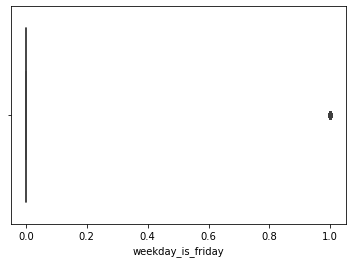

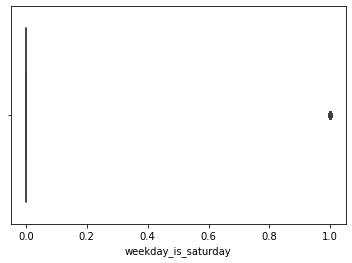

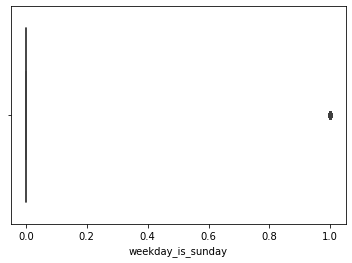

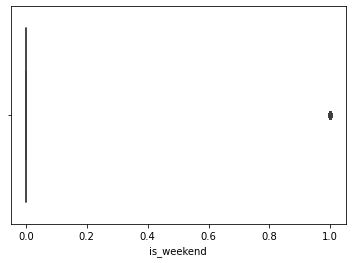

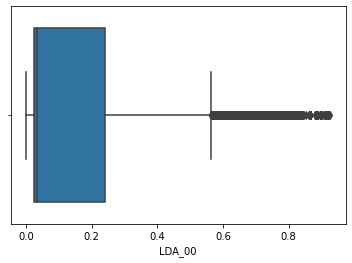

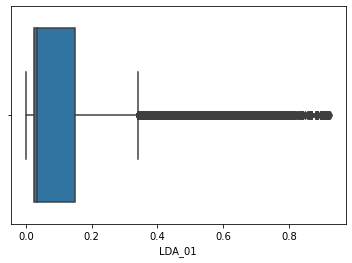

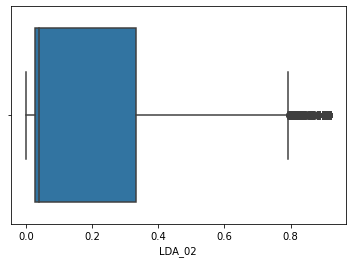

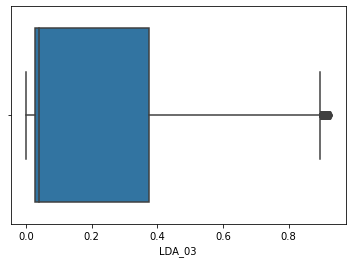

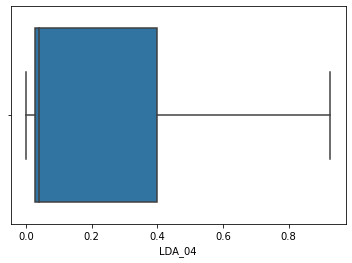

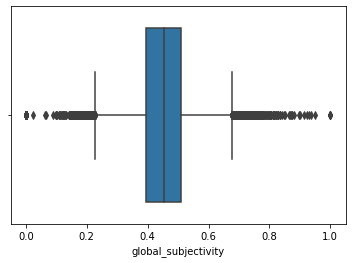

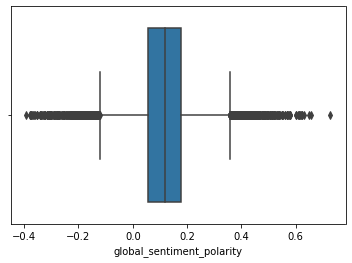

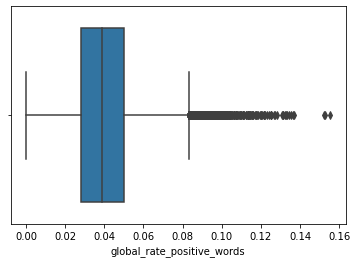

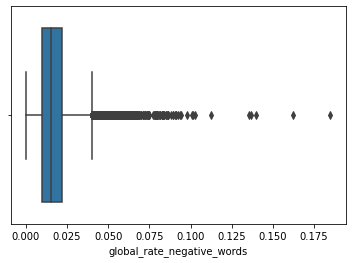

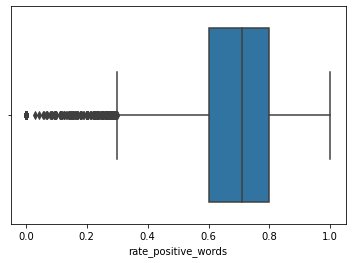

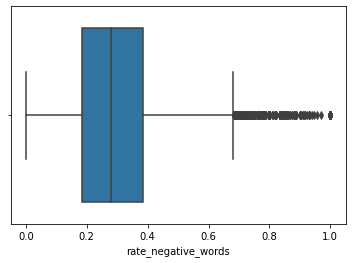

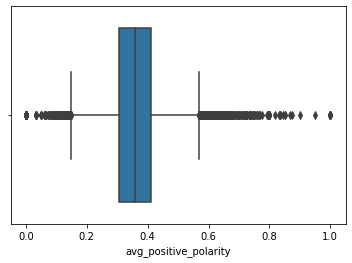

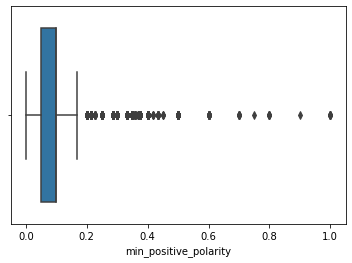

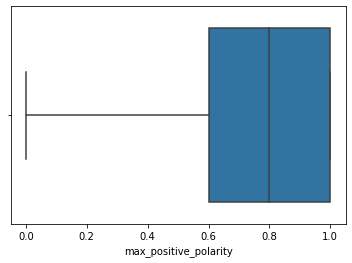

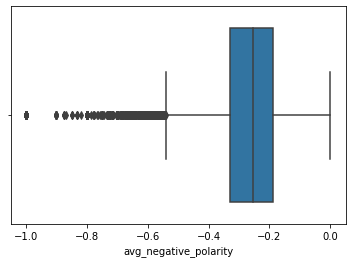

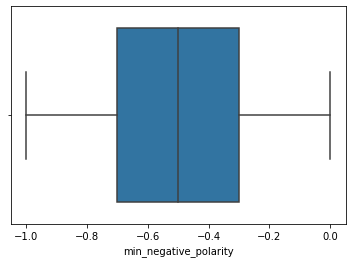

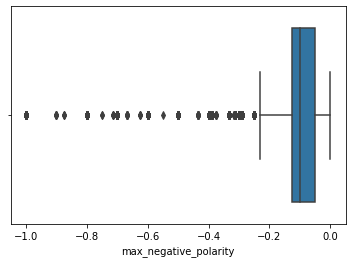

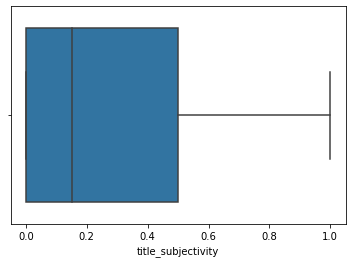

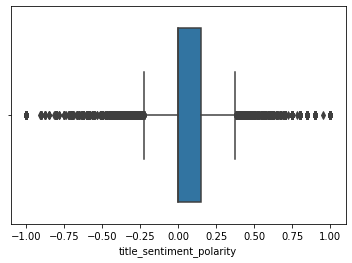

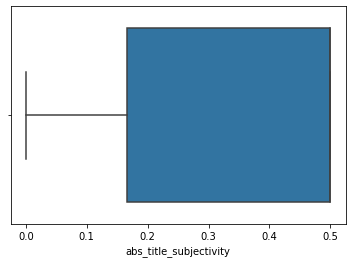

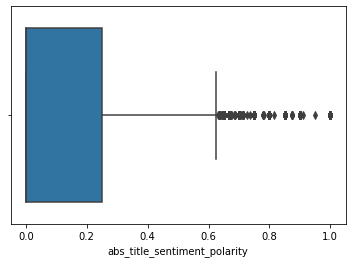

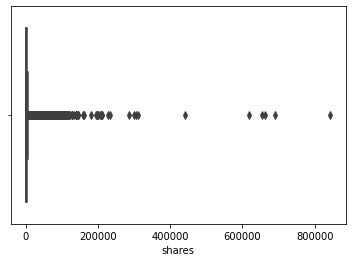

In [6]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [7]:
Q1 = df.quantile(q=0.25) 

Q3 = df.quantile(q=0.75)

IQR = Q3-Q1
print('IQR for each column:- ')
print(IQR)

IQR for each column:- 
timedelta                        3.780000e+02
n_tokens_title                   3.000000e+00
n_tokens_content                 4.700000e+02
n_unique_tokens                  1.378252e-01
n_non_stop_words                 4.314000e-09
n_non_stop_unique_tokens         1.288902e-01
num_hrefs                        1.000000e+01
num_self_hrefs                   3.000000e+00
num_imgs                         3.000000e+00
num_videos                       1.000000e+00
average_token_length             3.764347e-01
num_keywords                     3.000000e+00
data_channel_is_lifestyle        0.000000e+00
data_channel_is_entertainment    0.000000e+00
data_channel_is_bus              0.000000e+00
data_channel_is_socmed           0.000000e+00
data_channel_is_tech             0.000000e+00
data_channel_is_world            0.000000e+00
kw_min_min                       5.000000e+00
kw_max_min                       5.550000e+02
kw_avg_min                       2.152500e+02
kw_min_max 

In [0]:
sorted_shares = df.sort_values('shares') 

median = sorted_shares['shares'].median() 

q1 = sorted_shares['shares'].quantile(q=0.25) 

q3 = sorted_shares['shares'].quantile(q=0.75) 

iqr = q3-q1

In [9]:
Inner_bound1 = q1-(iqr*1.5) 
print(f'Inner Boundary 1 = {Inner_bound1}')
Inner_bound2 = q3+(iqr*1.5)  
print(f'Inner Boundary 2 = {Inner_bound2}')
Outer_bound1 = q1-(iqr*3)    
print(f'Outer Boundary 1 = {Outer_bound1}')
Outer_bound2 = q3+(iqr*3)   
print(f'Outer Boundary 2 = {Outer_bound2}')

Inner Boundary 1 = -1835.0
Inner Boundary 2 = 5581.0
Outer Boundary 1 = -4616.0
Outer Boundary 2 = 8362.0


In [0]:
Df = df[df['shares']<=Outer_bound2]

In [11]:
print(f'Data before Removing Outliers = {df.shape}')
print(f'Data after Removing Outliers = {Df.shape}')
print(f'Number of Outliers = {df.shape[0] - Df.shape[0]}')

Data before Removing Outliers = (39644, 60)
Data after Removing Outliers = (36879, 60)
Number of Outliers = 2765


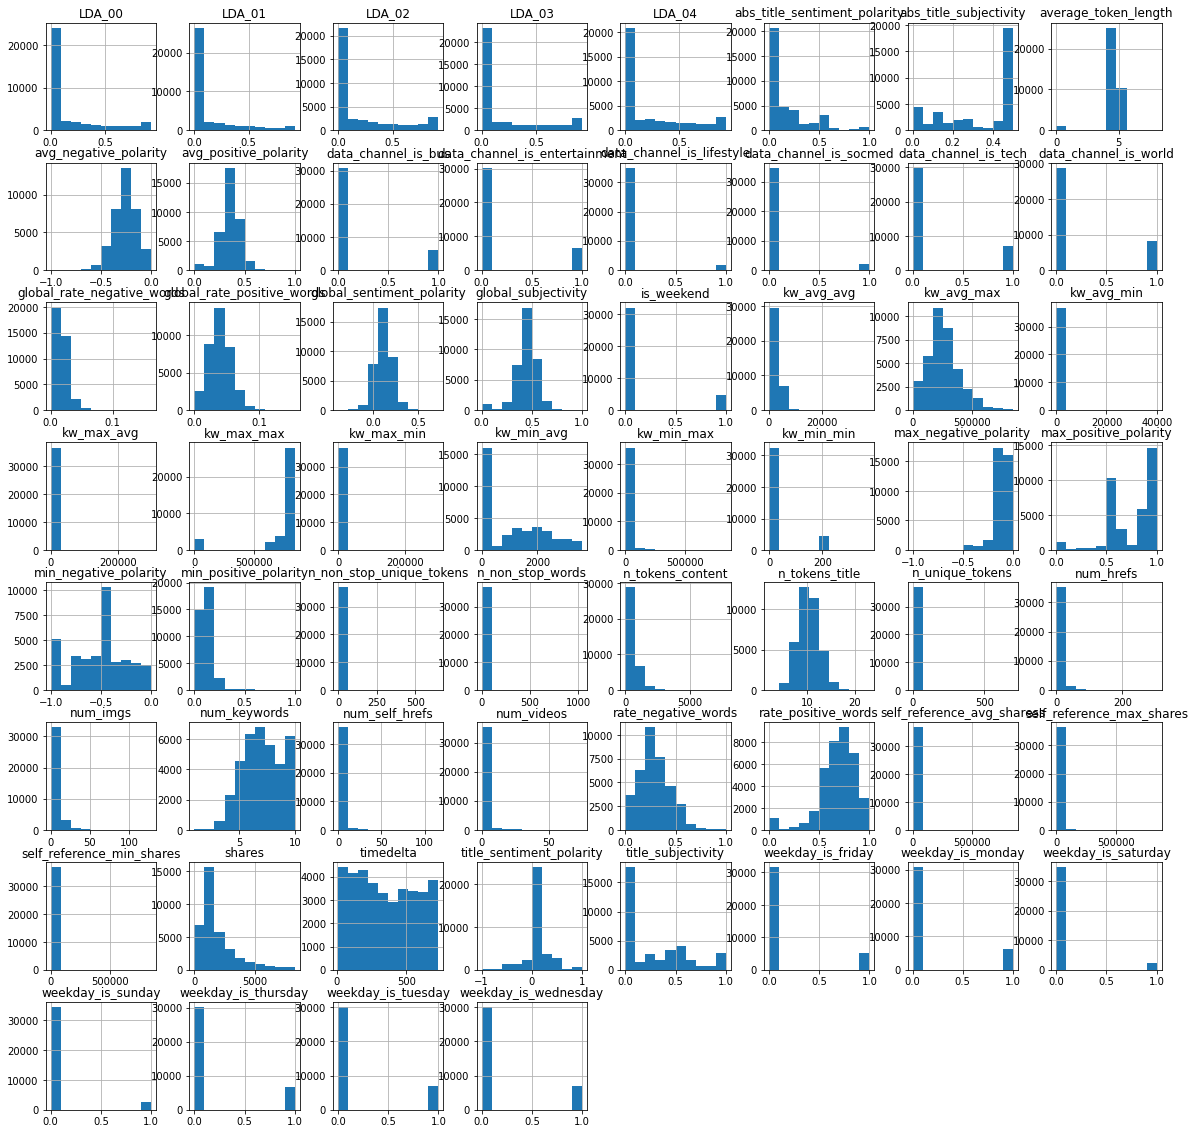

In [12]:
Df.hist(figsize=(20,20))
plt.show()

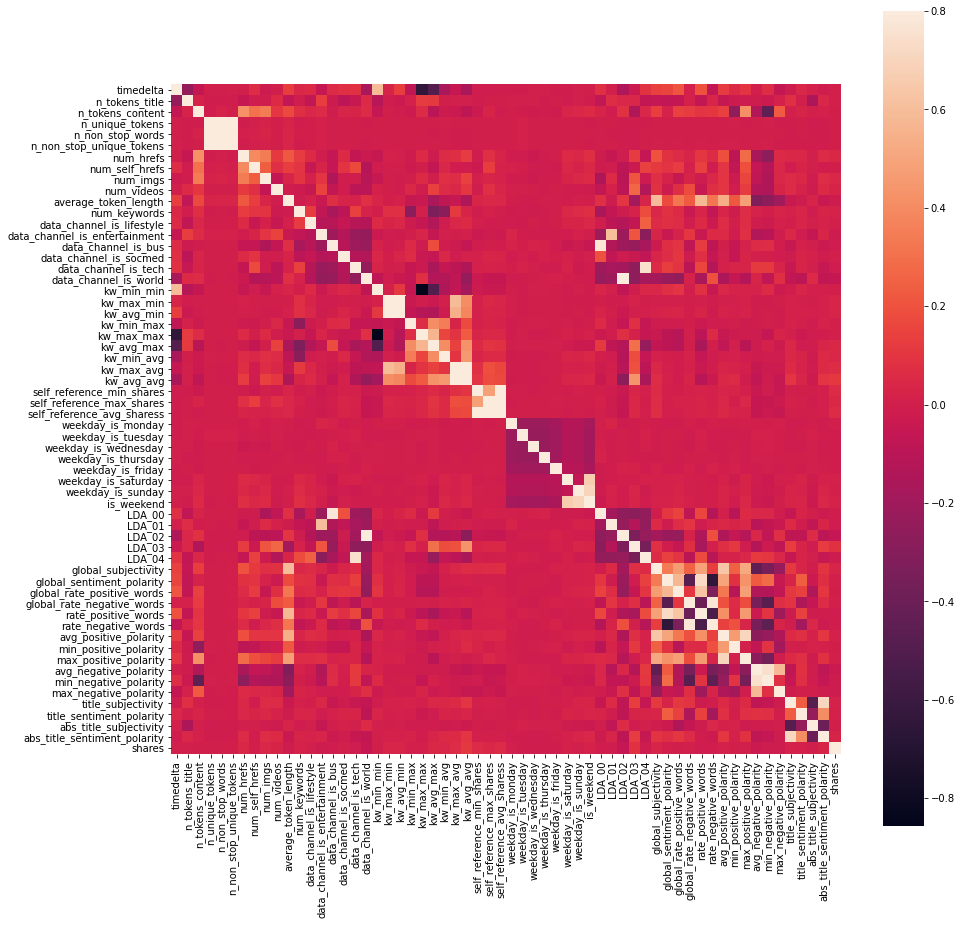

In [13]:
corr = df.corr()
fig = plt.figure(figsize = (15,15))
sns.heatmap(corr, vmax = .8, square = True)
plt.show()

In [14]:
#Helping Index for referrings
for i in range(len(Df.columns)):
    print(f'{i} -> {Df.columns[i]}')

0 -> timedelta
1 -> n_tokens_title
2 -> n_tokens_content
3 -> n_unique_tokens
4 -> n_non_stop_words
5 -> n_non_stop_unique_tokens
6 -> num_hrefs
7 -> num_self_hrefs
8 -> num_imgs
9 -> num_videos
10 -> average_token_length
11 -> num_keywords
12 -> data_channel_is_lifestyle
13 -> data_channel_is_entertainment
14 -> data_channel_is_bus
15 -> data_channel_is_socmed
16 -> data_channel_is_tech
17 -> data_channel_is_world
18 -> kw_min_min
19 -> kw_max_min
20 -> kw_avg_min
21 -> kw_min_max
22 -> kw_max_max
23 -> kw_avg_max
24 -> kw_min_avg
25 -> kw_max_avg
26 -> kw_avg_avg
27 -> self_reference_min_shares
28 -> self_reference_max_shares
29 -> self_reference_avg_sharess
30 -> weekday_is_monday
31 -> weekday_is_tuesday
32 -> weekday_is_wednesday
33 -> weekday_is_thursday
34 -> weekday_is_friday
35 -> weekday_is_saturday
36 -> weekday_is_sunday
37 -> is_weekend
38 -> LDA_00
39 -> LDA_01
40 -> LDA_02
41 -> LDA_03
42 -> LDA_04
43 -> global_subjectivity
44 -> global_sentiment_polarity
45 -> global_ra

In [0]:
a,b = Df['shares'].mean(),Df['shares'].median()

In [16]:
print(f'Mean article shares = {a}')
print(f'Median article share = {b}')

Mean article shares = 1916.4932888635808
Median article share = 1300.0


In [17]:
Wd = Df.columns.values[30:37]
Wd

array(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'], dtype=object)

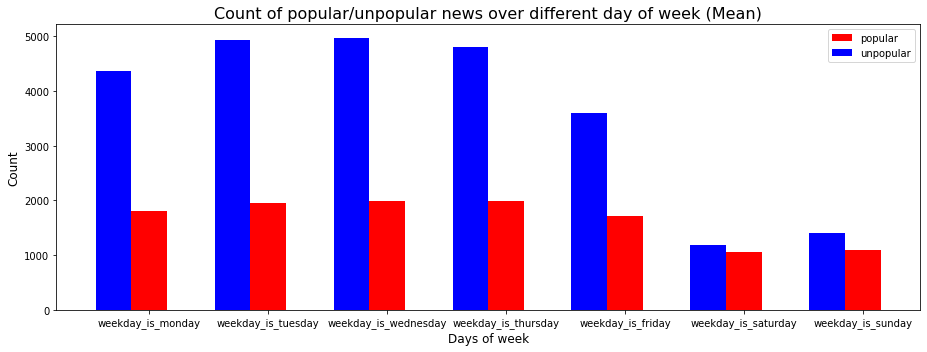

In [18]:
Unpop=Df[Df['shares']<a]
Pop=Df[Df['shares']>=a]
Unpop_day = Unpop[Wd].sum().values
Pop_day = Pop[Wd].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)
plt.bar(np.arange(len(Wd)), Pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Wd)), Wd)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

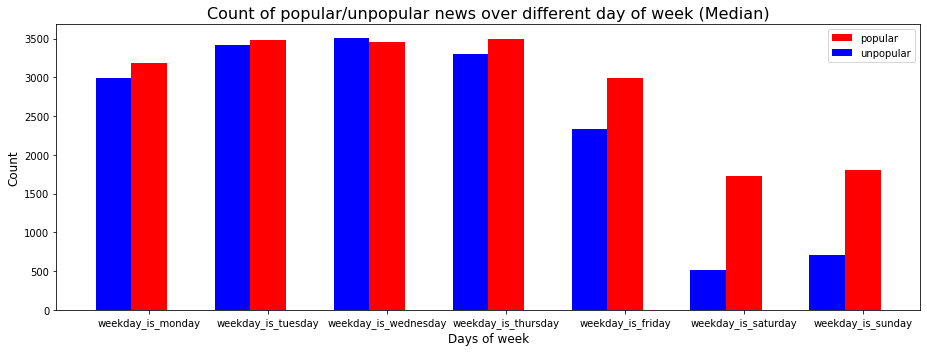

In [19]:
Unpop2=Df[Df['shares']<b]
Pop2=Df[Df['shares']>=b]
Unpop_day2 = Unpop2[Wd].sum().values
Pop_day2 = Pop2[Wd].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Median)", fontsize = 16)
plt.bar(np.arange(len(Wd)), Pop_day2, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day2, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Wd)), Wd)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [0]:
Dc = Df.columns.values[12:18]

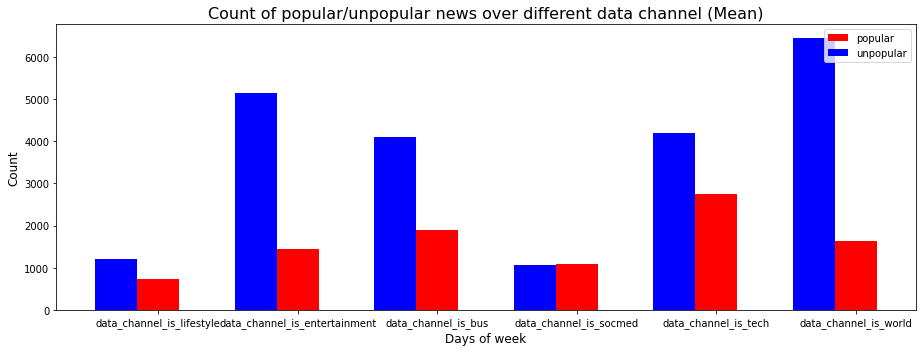

In [21]:
Unpop3=Df[Df['shares']<a]
Pop3=Df[Df['shares']>=a]
Unpop_day3 = Unpop3[Dc].sum().values
Pop_day3 = Pop3[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day3, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day3, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

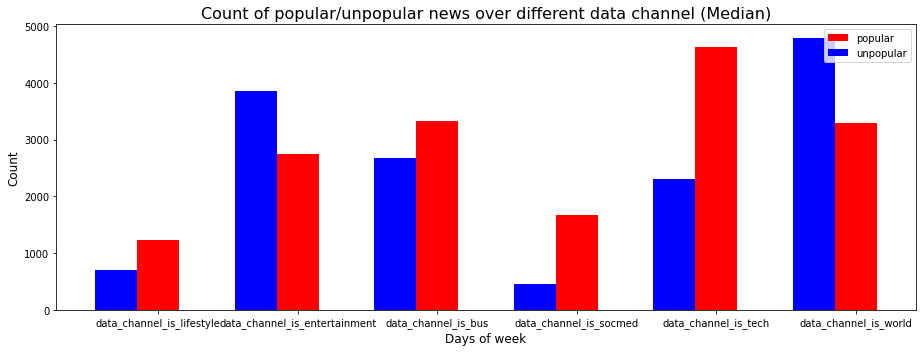

In [22]:
Unpop4=Df[Df['shares']<b]
Pop4=Df[Df['shares']>=b]
Unpop_day4 = Unpop4[Dc].sum().values
Pop_day4 = Pop4[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Median)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day4, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day4, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [0]:
from sklearn.preprocessing import scale as s
from sklearn.model_selection import train_test_split as t

In [0]:
DF = s(Df)

In [0]:
train,test = t(DF,test_size=0.2,random_state=0)

In [0]:
train_x,train_y = DF[:,0:59],DF[:,59] 

In [0]:
test_x,test_y = DF[:,0:59],DF[:,59]

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.


In [30]:
nn = Sequential()

#Input Layer
nn.add(Dense(59,input_dim = train_x.shape[1],kernel_initializer='normal',activation='relu'))

#Hidden Layer(s)
nn.add(Dense(200,activation='relu'))
nn.add(Dense(100,activation='relu'))
nn.add(Dense(50,activation='relu'))
nn.add(Dense(20,activation='relu'))


#Output Layer
nn.add(Dense(1,activation='linear'))

#Compilation
nn.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 59)                3540      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               12000     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 41,731
Trainable params: 41,731
Non-trainable params: 0
__________________________________________________

In [31]:
history = nn.fit(train_x, train_y, epochs=100, batch_size=32, validation_split = 0.2, verbose=1)
loss = history.history['loss']

Train on 29503 samples, validate on 7376 samples
Epoch 1/100
29503/29503 [==============================] - 2s 74us/step - loss: 0.6313 - mean_squared_error: 1.0640 - val_loss: 0.5622 - val_mean_squared_error: 0.8330
Epoch 2/100
29503/29503 [==============================] - 2s 59us/step - loss: 0.6172 - mean_squared_error: 1.0379 - val_loss: 0.5513 - val_mean_squared_error: 0.8447
Epoch 3/100
29503/29503 [==============================] - 2s 58us/step - loss: 0.6127 - mean_squared_error: 1.0145 - val_loss: 0.5487 - val_mean_squared_error: 0.8665
Epoch 4/100
29503/29503 [==============================] - 2s 59us/step - loss: 0.6075 - mean_squared_error: 1.0002 - val_loss: 0.5610 - val_mean_squared_error: 0.8282
Epoch 5/100
29503/29503 [==============================] - 2s 63us/step - loss: 0.6040 - mean_squared_error: 0.9934 - val_loss: 0.5503 - val_mean_squared_error: 0.8546
Epoch 6/100
29503/29503 [==============================] - 2s 58us/step - loss: 0.6019 - mean_squared_error: 0.

In [32]:
nn.evaluate(test_x,test_y)

36879/36879 [==============================] - 1s 20us/step


[0.35511772818432064, 0.437873899936676]

In [0]:
from keras.optimizers import SGD
opt = SGD(lr=0.5,momentum=0.9)
nn.compile(loss='mean_squared_error',optimizer=opt)

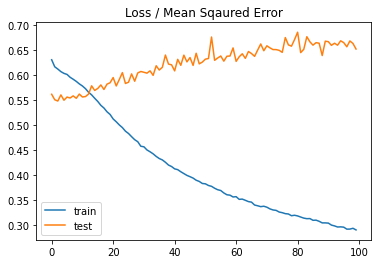

In [35]:
plt.title('Loss / Mean Sqaured Error')
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [36]:
y_pred = nn.predict(test_x)
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from math import sqrt
print(f'MAE  = {mean_absolute_error(test_y,y_pred)}')
print(f'MSE  = {mean_squared_error(test_y,y_pred)}')
print(f'RMSE = {sqrt(mean_squared_error(test_y,y_pred))}')

MAE  = 0.3551177275494302
MSE  = 0.43787417667227757
RMSE = 0.6617206182916455


In [37]:
train_mse = nn.evaluate(train_x,train_y,verbose=0)
test_mse = nn.evaluate(test_x,test_y,verbose=0)
print('Train = %.3f, Test = %.3f' % (train_mse,test_mse))

Train = 0.438, Test = 0.438


In [0]:
from sklearn.neural_network import MLPRegressor

In [39]:
mlp = MLPRegressor(hidden_layer_sizes = (200,100,50,1),max_iter=1000)
mlp.fit(train_x,train_y)
mlp_mse = mean_squared_error(test_y,mlp.predict(test_x))
mlp_mse

1.0000216469676162